Extracted files: ['Desert', 'Airport', 'Parking', 'Highway', 'Port', 'Lake', 'Railway', 'Grassland', 'Agriculture', 'Residential', 'Mountain', 'City', 'Forest', 'Beach', 'River']
Found 9600 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.
Classes found: {'Agriculture': 0, 'Airport': 1, 'Beach': 2, 'City': 3, 'Desert': 4, 'Forest': 5, 'Grassland': 6, 'Highway': 7, 'Lake': 8, 'Mountain': 9, 'Parking': 10, 'Port': 11, 'Railway': 12, 'Residential': 13, 'River': 14}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 65s 192ms/step - accuracy: 0.1522 - loss: 2.4996 - val_accuracy: 0.4963 - val_loss: 1.5625
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 187ms/step - accuracy: 0.4283 - loss: 1.7356 - val_accuracy: 0.5113 - val_loss: 1.4535
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 66s 222ms/step - accuracy: 0.4844 - loss: 1.5515 - val_accuracy: 0.5946 - val_loss: 1.2052
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 190ms/step - accuracy: 0.5394 - loss: 1.4233 - val_accuracy: 0.6012 - val_loss: 1.1210
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 186ms/step - accuracy: 0.5611 - loss: 1.3416 - val_accuracy: 0.6058 - val_loss: 1.1429
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 65s 217ms/step - accuracy: 0.5824 - loss: 1.2488 - val_accuracy: 0.6129 - val_loss: 1.0951
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 186ms/step - accuracy: 0.6018 - loss: 1.2222 - val_accuracy: 0.6483 - val_loss: 1.0411
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 187ms/step - accuracy: 0.6171 - loss: 1

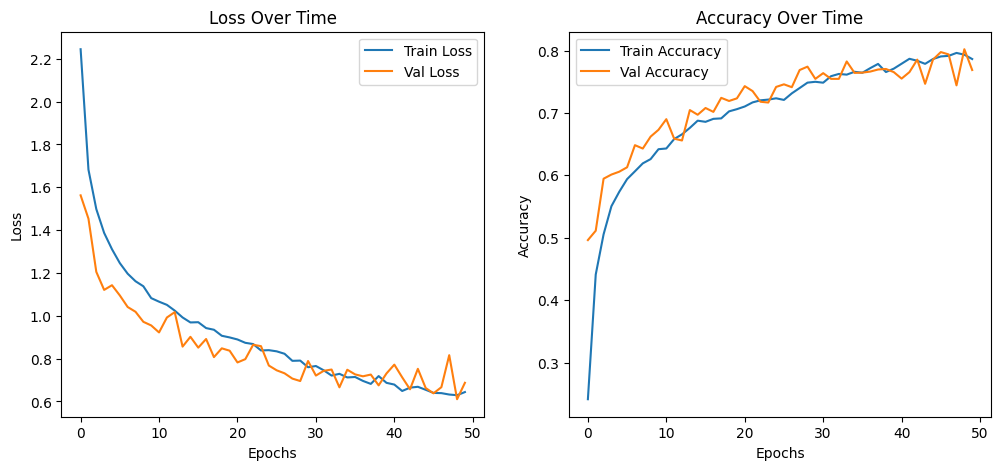

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/aerial_landscape_images"


if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

dataset_path = os.path.join(extract_path, "Aerial_Landscapes")

print("Extracted files:", os.listdir(dataset_path))

# Define image parameters
img_height, img_width = 128, 128
batch_size = 32

# Data augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Verify class distribution
print("Classes found:", train_generator.class_indices)

# Define CNN model
model = keras.Sequential
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save model
model.save("aerial_landscape_cnn.h5")

# Plot loss & accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Time")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


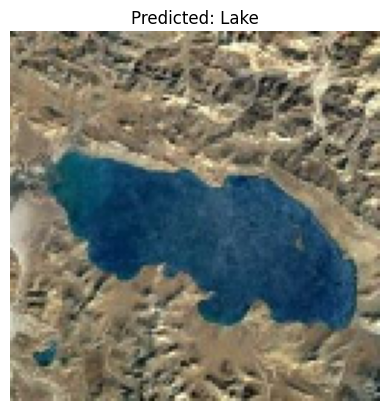

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model("aerial_landscape_cnn.h5")

test_image_path = "/content/drive/MyDrive/lake.jpg"

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Show the image & prediction
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

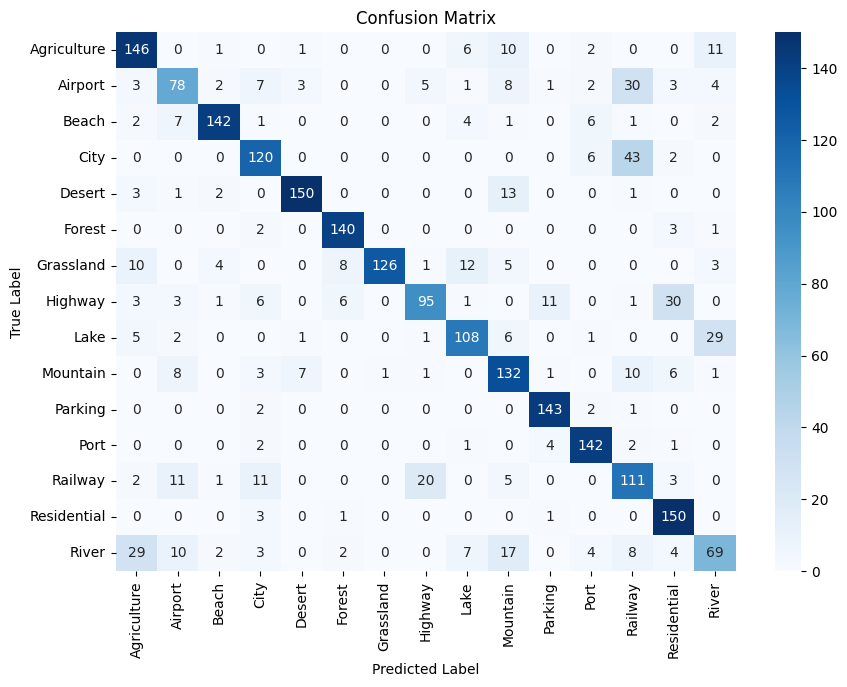

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predictions
true_labels = []
pred_labels = []

for images, labels in val_generator:
    preds = model.predict(images)
    pred_labels.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

    if len(true_labels) >= val_generator.samples:
        break

# Classification Report
print("Classification Report:\n", classification_report(true_labels, pred_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


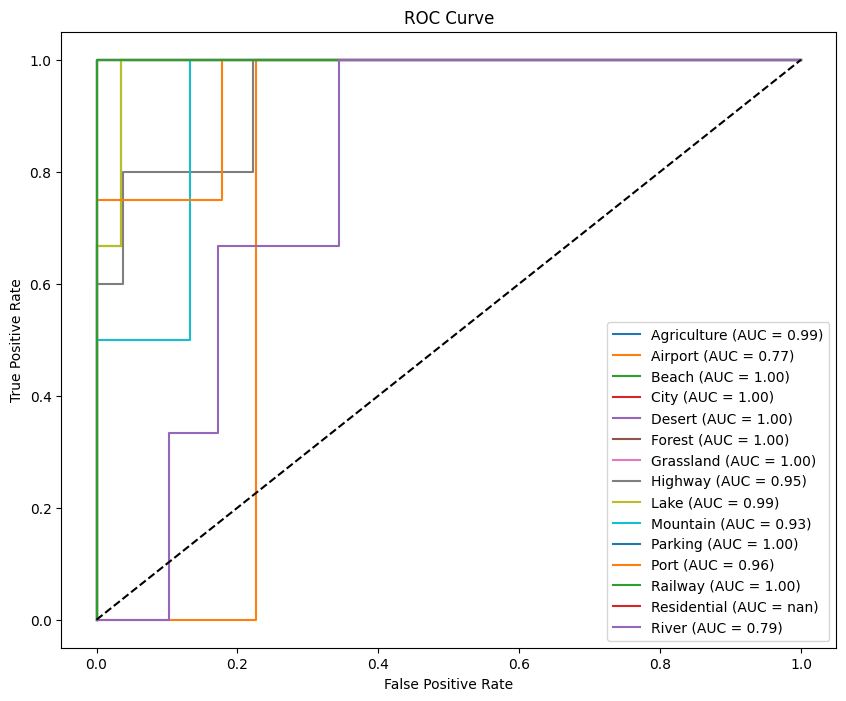

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

num_samples = 6000
x_val, y_val = next(val_generator)
x_val, y_val = x_val[:num_samples], y_val[:num_samples]

y_pred_probs = model.predict(x_val)

y_true_one_hot = np.array(tf.keras.utils.to_categorical(np.argmax(y_val, axis=1), num_classes=len(class_labels)))

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()



In [ ]:
 from scipy import stats
import numpy as np

# Convert predictions and true labels to NumPy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Perform Z-Test (Compare means of two distributions)
z_stat, z_p_value = stats.ttest_ind(true_labels, pred_labels, equal_var=False)
print(f"Z-Test: Statistic={z_stat}, P-value={z_p_value}")

# Perform T-Test (Check if means are significantly different)
t_stat, t_p_value = stats.ttest_rel(true_labels, pred_labels)
print(f"T-Test: Statistic={t_stat}, P-value={t_p_value}")

# Perform ANOVA (Analysis of Variance)
anova_stat, anova_p_value = stats.f_oneway(true_labels, pred_labels)
print(f"ANOVA: Statistic={anova_stat}, P-value={anova_p_value}")


Z-Test: Statistic=-1.6947263837825266, P-value=0.0901922430696002
T-Test: Statistic=-2.8280633621141247, P-value=0.004721924592646835
ANOVA: Statistic=2.87209751588861, P-value=0.09019223059021429
